# **Support vector machines (SVM)** #

**SVM is a powerful verstile ML model which is used for linear and non-linear data for classification and regression problems particularly for small and medium sized datasets**

- hard margin classification ensures that the model generalises better which means that the road width in greater .

- But this is not always true as outliers are present most of the times and it is not good , so you prefer soft margin classification . It finds a good balance between keeping the street as big as possible and limiting margin violations 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.svm import LinearSVC

In [2]:
iris=datasets.load_iris()
x=iris['data'][:,(2,3)]
y=(iris['target']==2).astype(int)

In [3]:
svm_clf=Pipeline([
    ('scaler',StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss='hinge')),
])

In [4]:
svm_clf.fit(x,y)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [5]:
svm_clf.predict([[5.5,1.7]])

array([1])

- **It just predicts the class unlike logistic regression.**

## **Non-linear SVMs** ##

- Sometimes it is impossible to seperate datasets using a linear line . One solution is to add more features i.e. polynomial features

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
nx,ny=make_moons(n_samples=100,noise=0.15)
poly_svm_clf=Pipeline([
    ('Polynomial_features' ,PolynomialFeatures(degree=3)),
    ('std_scaler' , StandardScaler()),
    ('svm_clf' , LinearSVC(C=10,loss='hinge')),
])

In [7]:
poly_svm_clf.fit(nx,ny)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('Polynomial_features', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

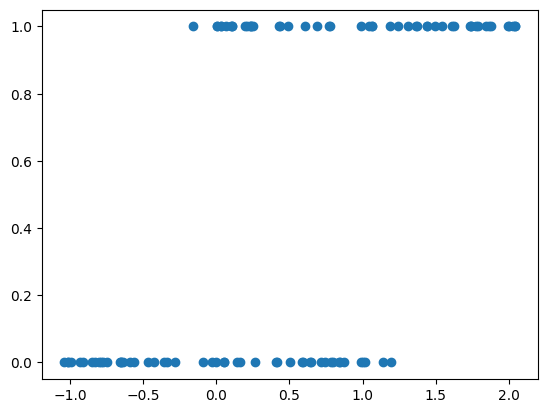

In [8]:
plt.scatter(nx[:,0],ny)

## **Polynomial Kernel** ##

- Using the polynomical method almost works with not only SVM but but with any model but It does not work well with low polynomial degree on huge datasets and if you increase your polynomial degree it slown down your model . So we use kernel trick which doesn't necessirily increase the polynomial features rather mimic it.

In [9]:
from sklearn.svm import SVC
svc_clf=Pipeline([
    ('std_scaler' ,StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5)),
])


In [10]:
poly_svm_clf.fit(nx,ny)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('Polynomial_features', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

## **Similarity Features** ##

- *New features are added on the basis of similarity function which means how much each instance resembles particular landmark . This basically makes non linearly seperable instances linearly seperable*

- It does so by using Gaussian RBF kernel but it's downside is that with a very large dataset you get an equally large number of features.

## **Gaussian RBF Kernel** ##

In [11]:
rbf_kermel_clf=Pipeline([
    ('std_scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='rbf',gamma=5,C=0.001)),
])
rbf_kermel_clf.fit(nx,ny)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

## **SVM Regression** ##

- Support vector machine isn't always used for classification rather it's also used for regression tasks . For this case it inverts the objective , instead of putting largest possible streets between classes it puts as many instances in the street as possible while limiting margin violations.

In [12]:
from sklearn.svm import LinearSVR
svm_reg=LinearSVR(epsilon=1.5)
svm_reg.fit(x,y)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5)

- **And again for non linearised data we will use kernalized SVM model**

In [13]:
from sklearn.svm import SVR
svm_poly_reg=SVR(kernel='poly',degree=2,C=100,epsilon=0.1)
svm_poly_reg.fit(x,y)

SVR(C=100, degree=2, kernel='poly')